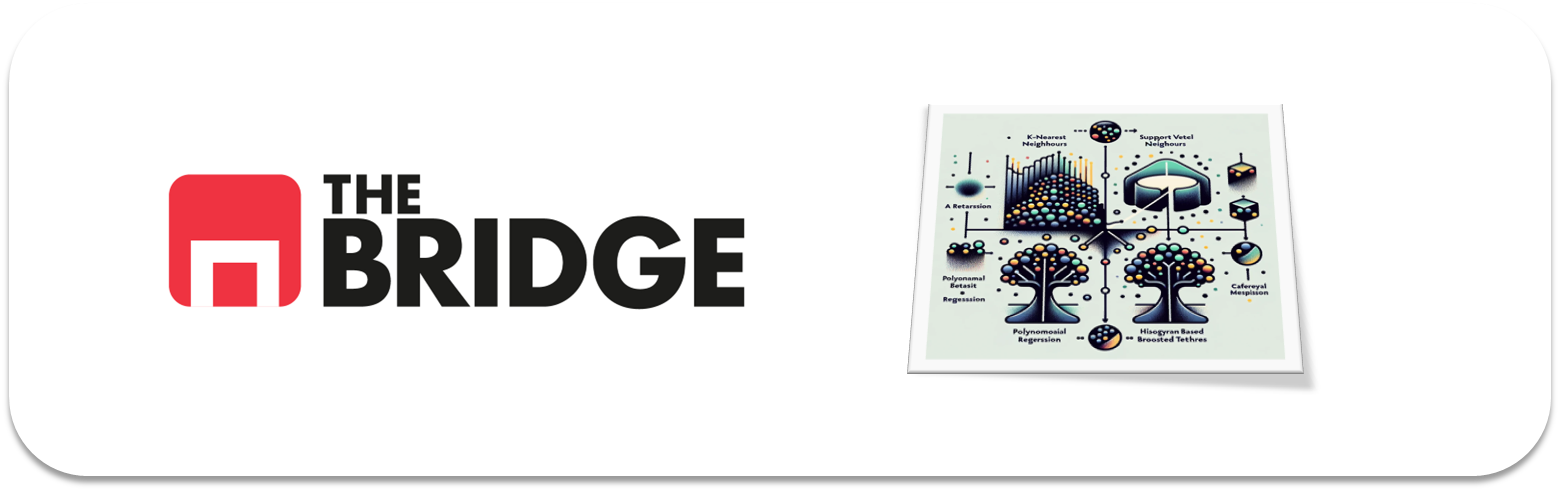

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bootcampviztools as bt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [24]:
#Importo el csv
df = pd.read_csv('./data/wines_dataset.csv',sep='|')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [26]:
# Definimos las target
target_clas = 'quality'
target_reg = 'alcohol'

<Axes: xlabel='quality', ylabel='percent'>

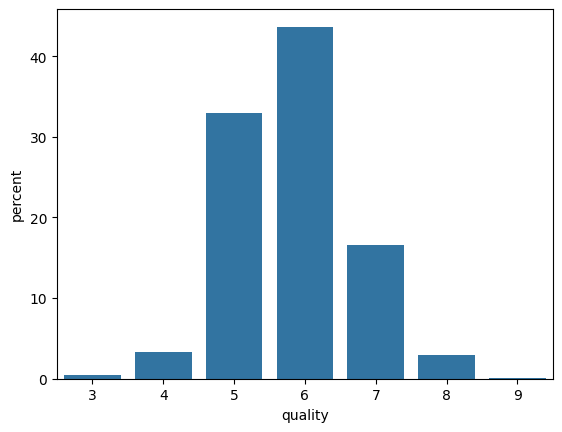

In [27]:
# Mostramos ambas target
sns.countplot(df,x='quality',stat='percent')

<Axes: xlabel='alcohol', ylabel='Percent'>

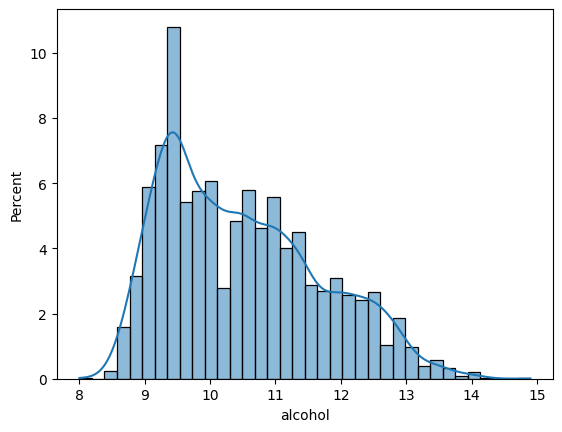

In [28]:
# Mostramos ambas target
sns.histplot(df,x='alcohol',stat='percent', kde=True)

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [29]:
# En primer lugar vamos a realizar el split de los datos.
# Puesto que hay una gran diferencia de los valores en el target vamos a aplicar en el split un stratify

X = df.copy()
X.drop(columns=target_clas, inplace = True)
y = pd.DataFrame(df[target_clas].copy())


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

6497 5197


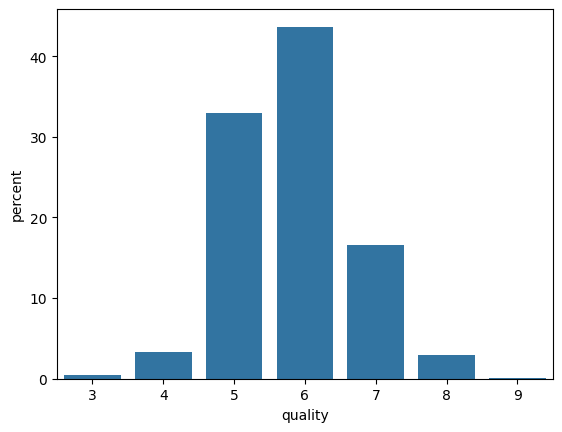

In [31]:
# Comprobamos que y_train tiene la misma distribución de valores
sns.countplot(y_train,x='quality',stat='percent')
print(len(df),len(y_train))

In [32]:
# Comprobamos el tipo de variables que tenemos
# Para ello vamos a realizar un value_counts de las variables
for col in X_train.columns:
    print(f"La columna {col} tiene {len(X_train[col].value_counts())} valores distintos y es de tipo {X_train[col].dtype}")


La columna fixed acidity tiene 104 valores distintos y es de tipo float64
La columna volatile acidity tiene 178 valores distintos y es de tipo float64
La columna citric acid tiene 88 valores distintos y es de tipo float64
La columna residual sugar tiene 302 valores distintos y es de tipo float64
La columna chlorides tiene 200 valores distintos y es de tipo float64
La columna free sulfur dioxide tiene 128 valores distintos y es de tipo float64
La columna total sulfur dioxide tiene 273 valores distintos y es de tipo float64
La columna density tiene 944 valores distintos y es de tipo float64
La columna pH tiene 104 valores distintos y es de tipo float64
La columna sulphates tiene 106 valores distintos y es de tipo float64
La columna alcohol tiene 103 valores distintos y es de tipo float64
La columna class tiene 2 valores distintos y es de tipo object


In [33]:
# Con esta información vemos que todas las columnas son numéricas excepto class que sería categórica
# Vemos tipología de variables
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.225159,0.338890,0.317801,5.458187,0.055968,30.649413,116.021840,0.994732,3.217982,0.531459,10.478466
std,1.305226,0.162974,0.145208,4.794210,0.033980,17.896279,56.642512,0.003006,0.159441,0.147496,1.185101
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994940,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000
max,15.900000,1.330000,1.660000,65.800000,0.467000,289.000000,440.000000,1.038980,4.010000,1.980000,14.900000


In [34]:
# Veo que los valores de Free sulfur dioxide y total sulfur dioxide podrían ser valores discretos, 
# por lo que vamos a evaluar sus valores.
import math
intermedios = X_train[X_train['free sulfur dioxide']-X_train['free sulfur dioxide'].apply(math.trunc)!=0]
intermedios2 = X_train[X_train['total sulfur dioxide']-X_train['total sulfur dioxide'].apply(math.trunc)!=0]
print(len(intermedios),len(intermedios2))


48 27


In [35]:
# Vemos que existen valores con decimales por lo que es necesario considerarlo como continua
# Establecemos la conversión de las columnas categóricas en numéricas
# Vemos los valores

X_train['class'].value_counts()



class
white    3909
red      1288
Name: count, dtype: int64

In [36]:
# Cambiamos el valor en función de los valores creando un 'One Hot Encoder' sencillo en el X_train
# Hacemos una copia de seguridad
X_train_copy = X_train.copy()

# Ahora codificamos el X_train
X_train['white'] = X_train['class'].apply(lambda x: 1 if x=='white' else 0).astype(float)
X_train['red'] = X_train['class'].apply(lambda x: 1 if x=='red' else 0).astype(float)
X_train.drop('class', axis=1, inplace=True)

# Hacemos lo mismo en el X_test
X_test['white'] = X_test['class'].apply(lambda x: 1 if x=='white' else 0).astype(float)
X_test['red'] = X_test['class'].apply(lambda x: 1 if x=='red' else 0).astype(float)
X_test.drop('class', axis=1, inplace=True)

X_train




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,red
5077,9.1,0.270,0.32,1.1,0.031,15.0,151.0,0.99360,3.03,0.41,10.6,1.0,0.0
3917,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,0.0,1.0
2906,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3,0.0,1.0
2878,6.3,0.220,0.33,1.7,0.041,67.0,164.0,0.99280,3.32,0.56,10.4,1.0,0.0
5844,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,1.0,0.0
5849,6.7,0.210,0.49,1.4,0.047,30.0,114.0,0.99140,2.92,0.42,10.8,1.0,0.0
5781,6.9,0.230,0.34,2.7,0.032,24.0,121.0,0.99020,3.14,0.38,12.4,1.0,0.0
2977,6.2,0.270,0.26,12.1,0.046,43.0,127.0,0.99510,3.16,0.37,10.8,1.0,0.0


In [37]:
# Vamos a ver la relación entre las variables con una matriz de correlación
# A partir de aquí vamos a revisar la relación de las variables
# Juntamos las features y el target en el mismo dataset
train = X_train.copy()
train[target_clas] = y_train
# quitamos las categoricas inicalmente para el estudio
train_copia = train.copy()
train.drop(columns=['white','red'],inplace=True)

# Generamos la matriz de correlación
corr = train.corr(numeric_only = True)
corr[target_clas].sort_values(ascending = False)



quality                 1.000000
alcohol                 0.439689
citric acid             0.095983
free sulfur dioxide     0.062885
sulphates               0.033801
pH                      0.005395
residual sugar         -0.029531
total sulfur dioxide   -0.041013
fixed acidity          -0.061450
chlorides              -0.202787
volatile acidity       -0.266623
density                -0.295533
Name: quality, dtype: float64

<Axes: >

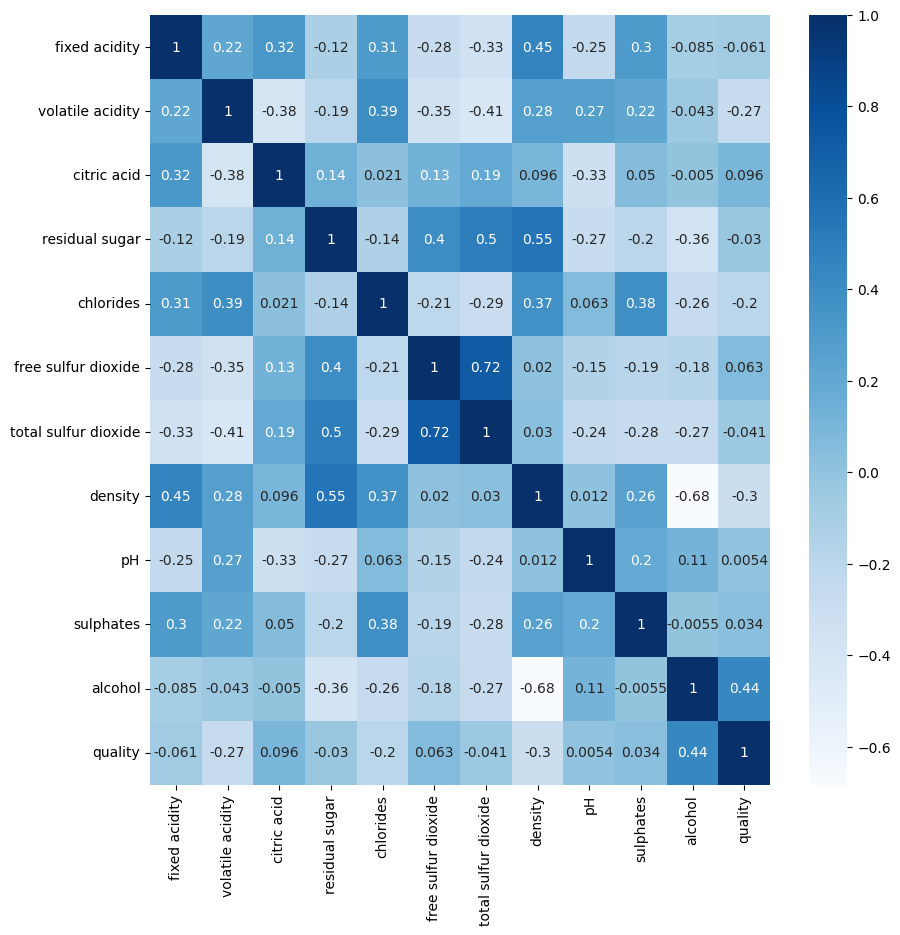

In [38]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = "Blues")

In [39]:
# Vemos una correlación muy alta entre la calidad y las variables:
# volatile acidity, chlorides, density, alcohol, white y red
# Realizamos ahora una comprobación de la colinealidad de las features
criterio_col = 0.7
excluidas = []
for col in train.columns:
    print(col)
    if col not in excluidas:
        for col_2,valor_corr in corr[col].items():
            print(col_2,valor_corr)
            if col != col_2 and col_2 in train.columns:
                if np.abs(valor_corr) >= criterio_col:
                    excluidas.append(col_2)
excluidas = list(set(excluidas))
print(excluidas)


fixed acidity
fixed acidity 1.0
volatile acidity 0.22081689642552826
citric acid 0.323177312268165
residual sugar -0.11770833235475922
chlorides 0.30763527040620914
free sulfur dioxide -0.2811235125291557
total sulfur dioxide -0.33494454890958236
density 0.4546153147426457
pH -0.24614874728997568
sulphates 0.3046094380188316
alcohol -0.08519457949118907
quality -0.061449776947887835
volatile acidity
fixed acidity 0.22081689642552826
volatile acidity 1.0
citric acid -0.37789663168176696
residual sugar -0.19321204202501435
chlorides 0.391150211443481
free sulfur dioxide -0.3540506336008934
total sulfur dioxide -0.41396900229274836
density 0.27557734123218314
pH 0.26506514356126154
sulphates 0.21927243504837732
alcohol -0.043211032009860685
quality -0.2666234074842013
citric acid
fixed acidity 0.323177312268165
volatile acidity -0.37789663168176696
citric acid 1.0
residual sugar 0.14378872779108376
chlorides 0.021045115234618147
free sulfur dioxide 0.1321643356538827
total sulfur dioxide 

In [40]:
train_copia

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white,red,quality
5077,9.1,0.270,0.32,1.1,0.031,15.0,151.0,0.99360,3.03,0.41,10.6,1.0,0.0,5
3917,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,0.0,1.0,7
2906,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3,0.0,1.0,5
2878,6.3,0.220,0.33,1.7,0.041,67.0,164.0,0.99280,3.32,0.56,10.4,1.0,0.0,6
5844,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,0.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,1.0,0.0,8
5849,6.7,0.210,0.49,1.4,0.047,30.0,114.0,0.99140,2.92,0.42,10.8,1.0,0.0,7
5781,6.9,0.230,0.34,2.7,0.032,24.0,121.0,0.99020,3.14,0.38,12.4,1.0,0.0,7
2977,6.2,0.270,0.26,12.1,0.046,43.0,127.0,0.99510,3.16,0.37,10.8,1.0,0.0,6


<Axes: xlabel='quality', ylabel='Count'>

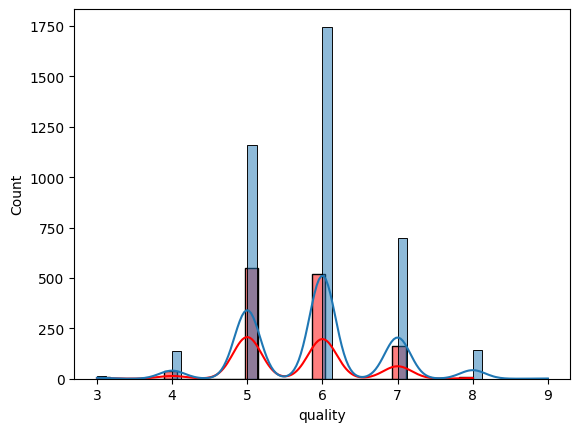

In [41]:
# PArece que Total sulful dioxide tiene relacion con red, white y con free sulful dioxide.
# Vamos a analizar las categóricas
X_train_copy[target_clas] = y_train
sns.histplot(x= target_clas, data = X_train_copy[X_train_copy['class'] == "red"], kde = True, color = "red")
sns.histplot(x= target_clas, data = X_train_copy[X_train_copy['class'] == "white"], kde = True)

In [42]:
# Vemos que el hecho de que el vino sea rojo o blanco no afecta a la calidad por lo que descartamos este valor
X_train.drop(columns=['red','white','total sulfur dioxide'], inplace=True)
X_test.drop(columns=['red','white','total sulfur dioxide'], inplace=True)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
5077,9.1,0.270,0.32,1.1,0.031,15.0,0.99360,3.03,0.41,10.6
3917,15.0,0.210,0.44,2.2,0.075,10.0,1.00005,3.07,0.84,9.2
2906,8.6,0.725,0.24,6.6,0.117,31.0,1.00140,3.32,1.07,9.3
2878,6.3,0.220,0.33,1.7,0.041,67.0,0.99280,3.32,0.56,10.4
5844,8.3,0.655,0.12,2.3,0.083,15.0,0.99660,3.17,0.66,9.8
...,...,...,...,...,...,...,...,...,...,...
4588,6.7,0.230,0.31,2.1,0.046,30.0,0.99260,3.33,0.64,10.7
5849,6.7,0.210,0.49,1.4,0.047,30.0,0.99140,2.92,0.42,10.8
5781,6.9,0.230,0.34,2.7,0.032,24.0,0.99020,3.14,0.38,12.4
2977,6.2,0.270,0.26,12.1,0.046,43.0,0.99510,3.16,0.37,10.8


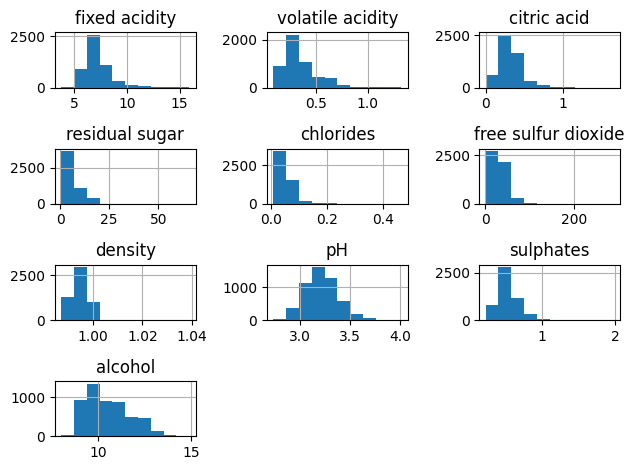

In [43]:
# Una vez tenemos ya las variables que vamos a utilizar buscamos los modelos con los que voy a realizar el estudio
# Vamos a ver su distribución
# Como hemos quitado las columnas categoricas no nos hace falta decir que solo las numéricas
X_train.hist()
plt.tight_layout()

In [47]:
# Vamos a aplicar el logaritmo a las columnas siguientes:
# residual_sugar, chlorides y free_sulful_dioxide
features_numericas = ['residual sugar','chlorides','free sulfur dioxide']
for feature in features_numericas:
    X_train[feature] = X_train[feature]+1
    X_train[feature] = X_train[feature].apply(np.log)
    
    X_test[feature] = X_test[feature]+1
    X_test[feature] = X_test[feature].apply(np.log)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
5077,9.1,0.270,0.32,0.441474,0.029629,1.327761,0.99360,3.03,0.41,10.6
3917,15.0,0.210,0.44,0.571864,0.067495,1.223156,1.00005,3.07,0.84,9.2
2906,8.6,0.725,0.24,0.745717,0.099793,1.496434,1.00140,3.32,1.07,9.3
2878,6.3,0.220,0.33,0.524591,0.038639,1.652403,0.99280,3.32,0.56,10.4
5844,8.3,0.655,0.12,0.579805,0.073915,1.327761,0.99660,3.17,0.66,9.8
...,...,...,...,...,...,...,...,...,...,...
4588,6.7,0.230,0.31,0.563483,0.043051,1.489299,0.99260,3.33,0.64,10.7
5849,6.7,0.210,0.49,0.487880,0.043926,1.489299,0.99140,2.92,0.42,10.8
5781,6.9,0.230,0.34,0.607875,0.030542,1.439569,0.99020,3.14,0.38,12.4
2977,6.2,0.270,0.26,0.821231,0.043051,1.565317,0.99510,3.16,0.37,10.8


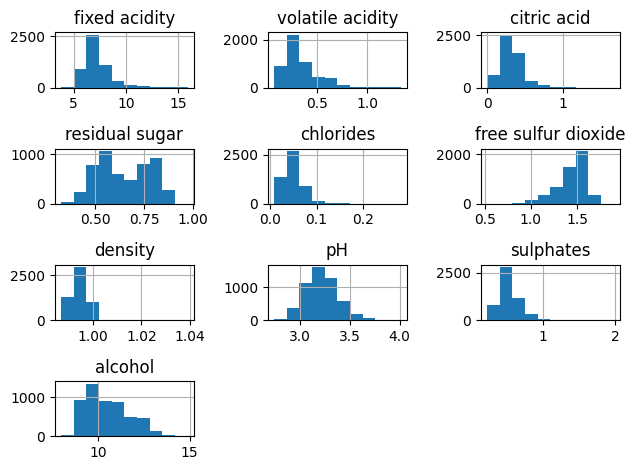

In [48]:
# Reploteamos para ver la distribución
X_train.hist()
plt.tight_layout()

In [51]:
# Esto tiene mejor pinta, ahora vamos a aplicar un escalado
# Tendremos que aplicar un StandardScaler

columnas = X_train.columns.to_list()
scaler = StandardScaler()
scaler.fit(X_train[columnas])
# Aplicamos el transform
X_train[columnas] =scaler.transform(X_train[columnas])
X_test[columnas] = scaler.transform(X_test[columnas])

X_train


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
5077,1.436549,-0.422745,0.015148,-1.550803,-0.846403,-0.661360,-0.376670,-1.179119,-0.823549,0.102561
3917,5.957273,-0.790938,0.841626,-0.575163,0.684357,-1.284671,1.769033,-0.928218,2.092065,-1.078887
2906,1.053437,2.369384,-0.535838,0.725690,1.990020,0.343709,2.218134,0.639914,3.651579,-0.994498
2878,-0.708879,-0.729573,0.084021,-0.928883,-0.482162,1.273082,-0.642804,0.639914,0.193525,-0.066217
5844,0.823570,1.939826,-1.362316,-0.515739,0.943893,-0.661360,0.621331,-0.300965,0.871575,-0.572552
...,...,...,...,...,...,...,...,...,...,...
4588,-0.402389,-0.668207,-0.053726,-0.637875,-0.303806,0.301195,-0.709337,0.702639,0.735965,0.186950
5849,-0.402389,-0.790938,1.185991,-1.203575,-0.268428,0.301195,-1.108538,-1.869097,-0.755744,0.271339
5781,-0.249145,-0.668207,0.152894,-0.305705,-0.809517,0.004866,-1.507739,-0.489141,-1.026964,1.621566
2977,-0.785502,-0.422745,-0.398091,1.290729,-0.303806,0.754160,0.122331,-0.363691,-1.094769,0.271339


In [55]:
# Una vez que tenemos el dataset preparado vamos a compensar el desbalanceo con weight
# Vamos a seleccionar los modelos que queremos utilizar
# Como se pide en el enunciado seleccionamos 3 modelos. En este caso seleccionamos tres modelos de clasificación:
#   K-NN
#   Random-Forest
#   Regresión logística
# En primer lugar usar un baseline con un knn de con 3 valores

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3,6,12],
    'leaf_size': [3,12]
}


grid_search = GridSearchCV(knn, # El modelo que quiero entrenar
                            param_grid, # El grid de parámetros
                            cv=5, # Folds del cross validation
                            scoring="recall_macro", # Métrica que quiero optimizar
                            n_jobs = -1 # Paralelizar
                            )

grid_search.fit(X_train, y_train)


c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [3, 12], 'n_neighbors': [3, 6, 12]},
             scoring='recall_macro')

              precision    recall  f1-score   support

           3       0.58      0.58      0.58        24
           4       0.56      0.60      0.58       173
           5       0.78      0.83      0.80      1710
           6       0.81      0.82      0.81      2269
           7       0.81      0.72      0.76       863
           8       0.77      0.55      0.64       154
           9       0.00      0.00      0.00         4

    accuracy                           0.79      5197
   macro avg       0.62      0.58      0.60      5197
weighted avg       0.79      0.79      0.79      5197



c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

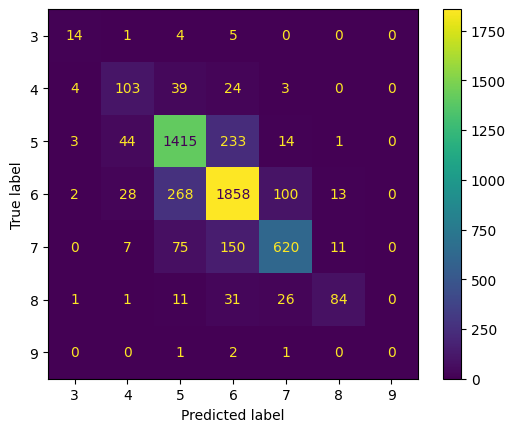

In [56]:
# Comprobamos el resultado que obtenemos con el X_train
# Definimos primero la función
def metrics(model,X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

metrics(grid_search,X_train, y_train)

              precision    recall  f1-score   support

           3       0.12      0.17      0.14         6
           4       0.15      0.16      0.16        43
           5       0.56      0.62      0.59       428
           6       0.58      0.58      0.58       567
           7       0.53      0.46      0.49       216
           8       0.25      0.15      0.19        39
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.31      0.31      0.31      1300
weighted avg       0.54      0.54      0.54      1300



c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

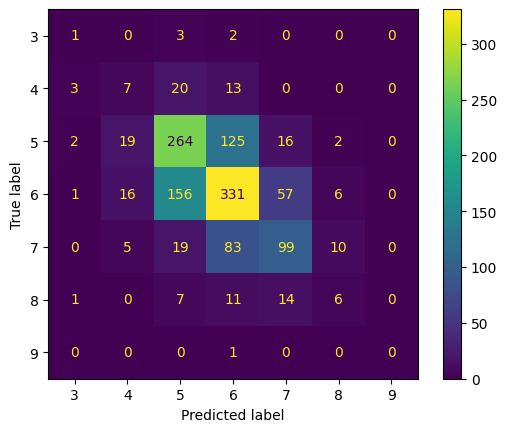

In [57]:
# Comprobamos ahora con el test
metrics(grid_search,X_test, y_test)

In [58]:
# Vemos que el valor de recall es bajo
# Vamos ahora a elegir otros modelos que podrían mejorar sobre el baseline
# Como se pide en el enunciado seleccionamos 3 modelos. En este caso seleccionamos tres modelos de clasificación:
#   K-NN
#   Random-Forest
#   Regresión logística
# En primer lugar vamos a hacer un cross validation con cada uno de los modelos

lg = LogisticRegression(random_state=42, max_iter = 25000, class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight='balanced')

clasificadores = [lg,knn,clf]

for clasificador in clasificadores:
    valores = {}
    print(clasificador)
    scores = cross_validate(clasificador, X_train, y_train, cv=5,
                            scoring=('precision_macro', 'recall_macro', 'f1_macro'))
    for score,matriz in scores.items():
        print(score,np.mean(matriz))
    print()
    print('***********************************')


LogisticRegression(class_weight='balanced', max_iter=25000, random_state=42)


c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y 

fit_time 0.07660384178161621
score_time 0.006074285507202149
test_precision_macro 0.2286358293169136
test_recall_macro 0.33754861910970596
test_f1_macro 0.194938919960512

***********************************
KNeighborsClassifier(n_neighbors=3, weights='distance')
fit_time 0.008935308456420899
score_time 0.023683643341064452
test_precision_macro 0.40408141927546526
test_recall_macro 0.37494936466029305
test_f1_macro 0.3853621424006376

***********************************
RandomForestClassifier(class_weight='balanced', max_depth=2, random_state=0)


c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_cla

fit_time 0.13806257247924805
score_time 0.011824607849121094
test_precision_macro 0.21053917720730103
test_recall_macro 0.27261353685050843
test_f1_macro 0.15712165306884165

***********************************


In [61]:
# Vemos que el mejor valor es el de Knn. Vamos a utilizar este para mejorar su resultado


knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3,12,20],
    'leaf_size': [3,12,20],
    'weights': ['distance','uniform']
}


grid_search = GridSearchCV(knn, # El modelo que quiero entrenar
                            param_grid, # El grid de parámetros
                            cv=5, # Folds del cross validation
                            scoring="recall_macro", # Métrica que quiero optimizar
                            n_jobs = -1 # Paralelizar
                            )

grid_search.fit(X_train, y_train)

c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [3, 12, 20], 'n_neighbors': [3, 12, 20],
                         'weights': ['distance', 'uniform']},
             scoring='recall_macro')

In [63]:
print(grid_search.best_estimator_)

KNeighborsClassifier(leaf_size=3, n_neighbors=3, weights='distance')


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.33      0.21      0.26        43
           5       0.66      0.66      0.66       428
           6       0.64      0.66      0.65       567
           7       0.57      0.59      0.58       216
           8       0.41      0.38      0.39        39
           9       0.00      0.00      0.00         1

    accuracy                           0.62      1300
   macro avg       0.37      0.36      0.36      1300
weighted avg       0.62      0.62      0.62      1300



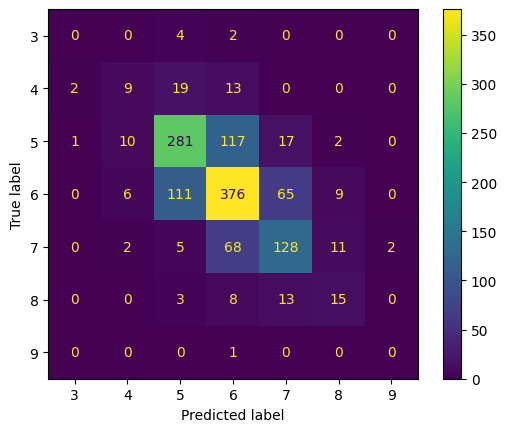

In [64]:
metrics(grid_search,X_test, y_test)

In [65]:
# Tenemos un valor muy bueno en la calidades 5,6 y 7 pero bajamos mucho en las clases restantes. Habría que ver en estos casos
# cual es el problema. 
# Vamos a hacer otra prueba con otros valores cercanos a los best estimator

# Vemos que el mejor valor es el de Knn. Vamos a utilizar este para mejorar su resultado


knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [2,3,6],
    'leaf_size': [2,3,6],
    'weights': ['distance','uniform']
}


grid_search = GridSearchCV(knn, # El modelo que quiero entrenar
                            param_grid, # El grid de parámetros
                            cv=5, # Folds del cross validation
                            scoring="recall_macro", # Métrica que quiero optimizar
                            n_jobs = -1 # Paralelizar
                            )

grid_search.fit(X_train, y_train)

c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [2, 3, 6], 'n_neighbors': [2, 3, 6],
                         'weights': ['distance', 'uniform']},
             scoring='recall_macro')

In [66]:
print(grid_search.best_estimator_)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, weights='distance')


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.32      0.23      0.27        43
           5       0.66      0.64      0.65       428
           6       0.63      0.67      0.65       567
           7       0.56      0.56      0.56       216
           8       0.42      0.36      0.39        39
           9       0.00      0.00      0.00         1

    accuracy                           0.61      1300
   macro avg       0.37      0.35      0.36      1300
weighted avg       0.61      0.61      0.61      1300



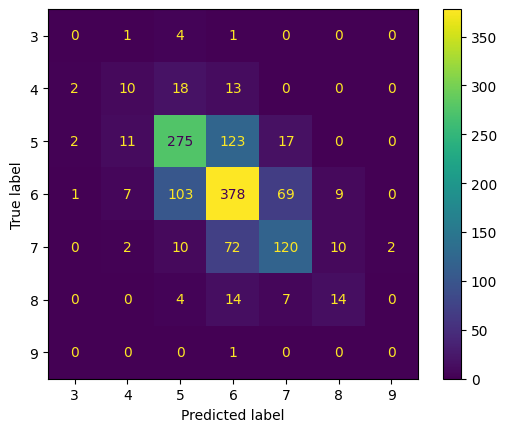

In [67]:
metrics(grid_search,X_test, y_test)

In [ ]:
# Hemos mejorado poco 

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [75]:
# En primer lugar vamos a realizar el split de los datos.
# Puesto que hay una gran diferencia de los valores en el target vamos a aplicar en el split un stratify

X = df.copy()
X.drop(columns=target_reg, inplace = True)
y = pd.DataFrame(df[target_reg].copy())


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Comprobamos el tipo de variables que tenemos
# Para ello vamos a realizar un value_counts de las variables
for col in X_train.columns:
    print(f"La columna {col} tiene {len(X_train[col].value_counts())} valores distintos y es de tipo {X_train[col].dtype}")

La columna fixed acidity tiene 100 valores distintos y es de tipo float64
La columna volatile acidity tiene 177 valores distintos y es de tipo float64
La columna citric acid tiene 87 valores distintos y es de tipo float64
La columna residual sugar tiene 308 valores distintos y es de tipo float64
La columna chlorides tiene 194 valores distintos y es de tipo float64
La columna free sulfur dioxide tiene 132 valores distintos y es de tipo float64
La columna total sulfur dioxide tiene 274 valores distintos y es de tipo float64
La columna density tiene 951 valores distintos y es de tipo float64
La columna pH tiene 106 valores distintos y es de tipo float64
La columna sulphates tiene 106 valores distintos y es de tipo float64
La columna quality tiene 7 valores distintos y es de tipo int64
La columna class tiene 2 valores distintos y es de tipo object


In [78]:
# Cambiamos el valor en función de los valores creando un 'One Hot Encoder' sencillo en el X_train
# Hacemos una copia de seguridad
X_train_copy = X_train.copy()

# Ahora codificamos el X_train
X_train['white'] = X_train['class'].apply(lambda x: 1 if x=='white' else 0).astype(float)
X_train['red'] = X_train['class'].apply(lambda x: 1 if x=='red' else 0).astype(float)
X_train.drop('class', axis=1, inplace=True)

# Hacemos lo mismo en el X_test
X_test['white'] = X_test['class'].apply(lambda x: 1 if x=='white' else 0).astype(float)
X_test['red'] = X_test['class'].apply(lambda x: 1 if x=='red' else 0).astype(float)
X_test.drop('class', axis=1, inplace=True)

X_train


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,white,red
1916,7.9,0.18,0.40,2.20,0.049,38.0,67.0,0.99600,3.33,0.93,5,0.0,1.0
947,7.1,0.18,0.74,15.60,0.044,44.0,176.0,0.99960,3.38,0.67,6,1.0,0.0
877,7.6,0.51,0.24,1.20,0.040,10.0,104.0,0.99200,3.05,0.29,6,1.0,0.0
2927,6.0,0.25,0.28,7.70,0.053,37.0,132.0,0.99489,3.06,0.50,6,1.0,0.0
6063,9.0,0.38,0.41,2.40,0.103,6.0,10.0,0.99604,3.13,0.58,7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6.4,0.24,0.50,11.60,0.047,60.0,211.0,0.99660,3.18,0.57,5,1.0,0.0
5191,6.6,0.22,0.28,12.05,0.058,25.0,125.0,0.99856,3.45,0.45,5,1.0,0.0
5226,6.6,0.20,0.38,7.90,0.052,30.0,145.0,0.99470,3.32,0.56,7,1.0,0.0
5390,7.3,0.41,0.29,1.80,0.032,26.0,74.0,0.98889,2.96,0.35,8,1.0,0.0


In [79]:
# Vamos a ver la relación entre las variables con una matriz de correlación
# A partir de aquí vamos a revisar la relación de las variables
# Juntamos las features y el target en el mismo dataset
train = X_train.copy()
train[target_reg] = y_train
# quitamos las categoricas inicalmente para el estudio
train_copia = train.copy()
train.drop(columns=['white','red'],inplace=True)

# Generamos la matriz de correlación
corr = train.corr(numeric_only = True)
corr[target_reg].sort_values(ascending = False)



alcohol                 1.000000
quality                 0.450403
pH                      0.116497
sulphates               0.000412
citric acid            -0.005690
volatile acidity       -0.036041
fixed acidity          -0.091964
free sulfur dioxide    -0.188460
chlorides              -0.260508
total sulfur dioxide   -0.272970
residual sugar         -0.357459
density                -0.682345
Name: alcohol, dtype: float64

<Axes: >

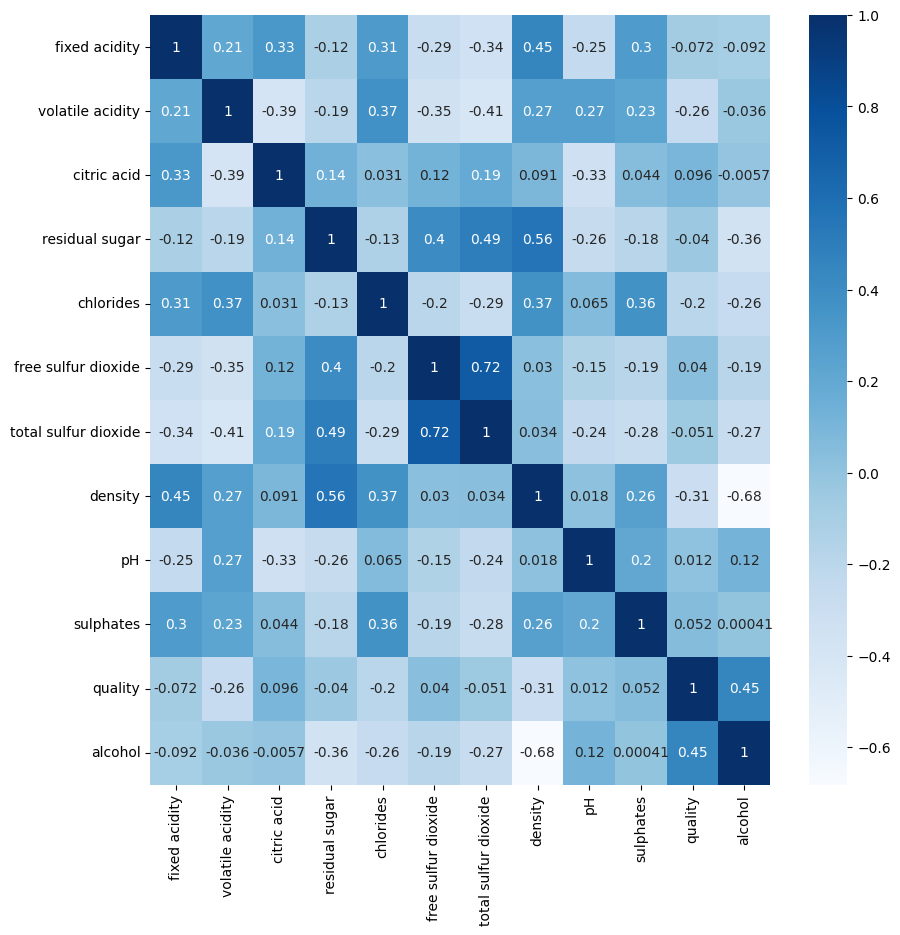

In [80]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = "Blues")

In [81]:
# Realizamos ahora una comprobación de la colinealidad de las features
criterio_col = 0.7
excluidas = []
for col in train.columns:
    print(col)
    if col not in excluidas:
        for col_2,valor_corr in corr[col].items():
            print(col_2,valor_corr)
            if col != col_2 and col_2 in train.columns:
                if np.abs(valor_corr) >= criterio_col:
                    excluidas.append(col_2)
excluidas = list(set(excluidas))
print(excluidas)


fixed acidity
fixed acidity 1.0
volatile acidity 0.21447211820241213
citric acid 0.32656238908459734
residual sugar -0.11899480770078436
chlorides 0.30564499646851095
free sulfur dioxide -0.2876366828403263
total sulfur dioxide -0.33925472614992497
density 0.4534465806801762
pH -0.24915098502884075
sulphates 0.3007490334413905
quality -0.07169835063257382
alcohol -0.0919641014738165
volatile acidity
fixed acidity 0.21447211820241213
volatile acidity 1.0
citric acid -0.3862275509707082
residual sugar -0.19415185502648521
chlorides 0.3739950180421181
free sulfur dioxide -0.34605932448015103
total sulfur dioxide -0.41221838422372215
density 0.27152288921723855
pH 0.27245765868577154
sulphates 0.2254986302135302
quality -0.2553679193905233
alcohol -0.03604107175729059
citric acid
fixed acidity 0.32656238908459734
volatile acidity -0.3862275509707082
citric acid 1.0
residual sugar 0.13860027490349966
chlorides 0.03076099108380768
free sulfur dioxide 0.12366424059709726
total sulfur dioxide 

<Axes: xlabel='alcohol', ylabel='Count'>

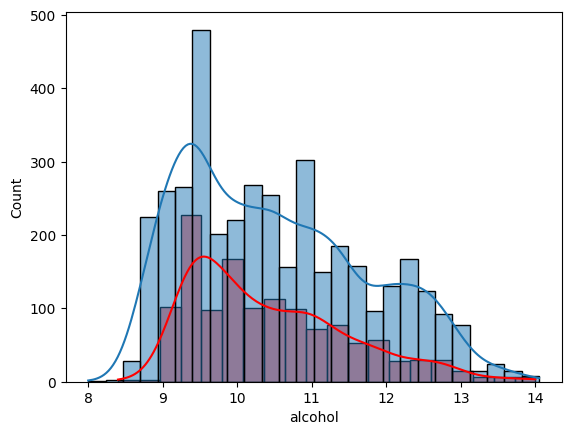

In [82]:
# Volvemos a ver que 'total sulful dioxide' puede elimnarse

# PArece que Total sulfur dioxide tiene relacion con red, white y con free sulful dioxide.
# Vamos a analizar las categóricas
X_train_copy[target_reg] = y_train
sns.histplot(x= target_reg, data = X_train_copy[X_train_copy['class'] == "red"], kde = True, color = "red")
sns.histplot(x= target_reg, data = X_train_copy[X_train_copy['class'] == "white"], kde = True)

In [83]:
# Vemos que al igual que antes no parece haber una relación clara con el valor de la clase y el predictor
X_train.drop(columns=['red','white','total sulfur dioxide'], inplace=True)
X_test.drop(columns=['red','white','total sulfur dioxide'], inplace=True)
X_train


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,quality
1916,7.9,0.18,0.40,2.20,0.049,38.0,0.99600,3.33,0.93,5
947,7.1,0.18,0.74,15.60,0.044,44.0,0.99960,3.38,0.67,6
877,7.6,0.51,0.24,1.20,0.040,10.0,0.99200,3.05,0.29,6
2927,6.0,0.25,0.28,7.70,0.053,37.0,0.99489,3.06,0.50,6
6063,9.0,0.38,0.41,2.40,0.103,6.0,0.99604,3.13,0.58,7
...,...,...,...,...,...,...,...,...,...,...
3772,6.4,0.24,0.50,11.60,0.047,60.0,0.99660,3.18,0.57,5
5191,6.6,0.22,0.28,12.05,0.058,25.0,0.99856,3.45,0.45,5
5226,6.6,0.20,0.38,7.90,0.052,30.0,0.99470,3.32,0.56,7
5390,7.3,0.41,0.29,1.80,0.032,26.0,0.98889,2.96,0.35,8


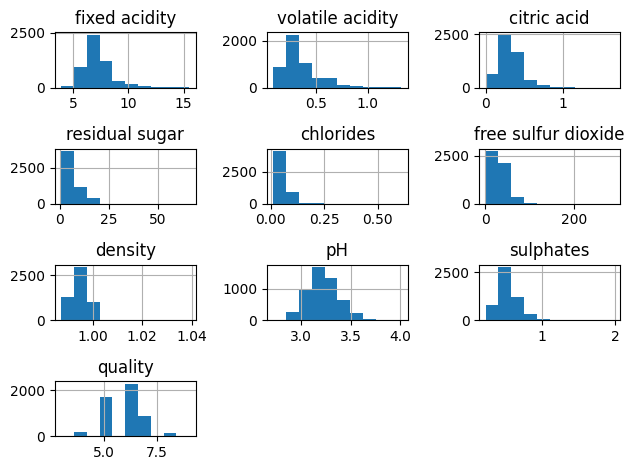

In [84]:
# Una vez tenemos ya las variables que vamos a utilizar buscamos los modelos con los que voy a realizar el estudio
# Vamos a ver su distribución
# Como hemos quitado las columnas categoricas no nos hace falta decir que solo las numéricas
X_train.hist()
plt.tight_layout()

In [85]:
# Vamos a aplicar el logaritmo a las columnas siguientes:
# residual_sugar, chlorides y free_sulful_dioxide
features_numericas = ['residual sugar','chlorides','free sulfur dioxide']
for feature in features_numericas:
    X_train[feature] = X_train[feature]+1
    X_train[feature] = X_train[feature].apply(np.log)
    
    X_test[feature] = X_test[feature]+1
    X_test[feature] = X_test[feature].apply(np.log)


In [86]:
# vamos a aplicar un escalado
# Tendremos que aplicar un StandardScaler

columnas = X_train.columns.to_list()
scaler = StandardScaler()
scaler.fit(X_train[columnas])
# Aplicamos el transform
X_train[columnas] =scaler.transform(X_train[columnas])
X_test[columnas] = scaler.transform(X_test[columnas])

X_train


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,quality
1916,0.530566,-0.979287,0.553261,-0.675439,-0.205494,0.603446,0.426887,0.692811,2.696948,-0.939103
947,-0.087744,-0.979287,2.882601,1.736215,-0.370242,0.820606,1.622065,1.005292,0.939171,0.209525
877,0.298700,1.046217,-0.542899,-1.224341,-0.502610,-1.317236,-0.901088,-1.057086,-1.629887,0.209525
2927,-0.937920,-0.549635,-0.268859,0.789749,-0.074260,0.564028,0.058374,-0.994590,-0.210144,0.209525
6063,1.380743,0.248291,0.621771,-0.586628,1.525362,-2.003136,0.440167,-0.557116,0.330710,1.358153
...,...,...,...,...,...,...,...,...,...,...
3772,-0.628765,-0.611014,1.238361,1.332323,-0.271299,1.282255,0.626083,-0.244634,0.263103,-0.939103
5191,-0.474187,-0.733772,-0.268859,1.383730,0.089083,-0.011858,1.276791,1.442767,-0.548178,-0.939103
5226,-0.474187,-0.856530,0.416241,0.823045,-0.107022,0.255061,-0.004705,0.630314,0.195496,1.358153
5390,0.066834,0.432428,-0.200349,-0.871054,-0.768879,0.045414,-1.933589,-1.619553,-1.224246,2.506780


In [88]:

# Generamos un modelo base con regresion lineal.

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [89]:
lin_reg.coef_

array([[ 0.55649534,  0.23310061,  0.06653503,  0.63398042, -0.03648525,
        -0.15468793, -1.44253661,  0.36860671,  0.16355983,  0.19894979]])

In [90]:
### train_error
from sklearn.metrics import median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
pred_train = lin_reg.predict(X_train)

print("MAE:", median_absolute_error(y_train, pred_train))
print("RMSE:", root_mean_squared_error(y_train, pred_train))
print("R^2:", lin_reg.score(X_train, y_train))


MAE: 0.3544116304299667
RMSE: 0.6069967818020763
R^2: 0.7415503345235663


In [91]:
# Vemos que ocurre con el test
pred_test = lin_reg.predict(X_test)

print("MAE:", median_absolute_error(y_test, pred_test))
print("RMSE:", root_mean_squared_error(y_test, pred_test))
print("R^2:", lin_reg.score(X_test, y_test))

MAE: 0.3386193471143919
RMSE: 0.5462790232601059
R^2: 0.7882480188750927


Text(0, 0.5, 'Prediction')

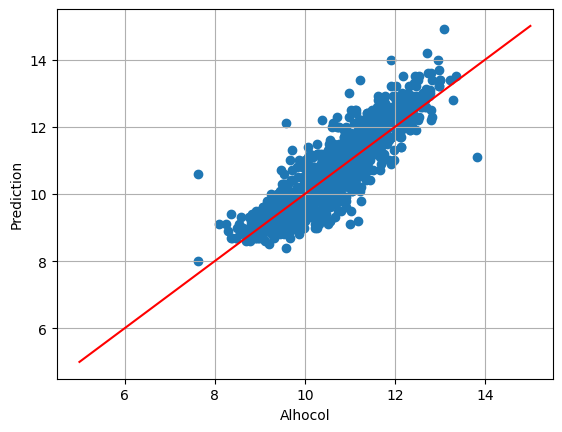

In [106]:
# Tenemos un Mean Absolute Error de 0.33 y un R^2 de 0.78. no parece un error muy altos dados los valores del grado alcoholico
plt.scatter(x=pred_test,y=y_test.alcohol)
plt.plot([5,15],[5,15],'red')
plt.grid()
plt.xlabel('Alhocol')
plt.ylabel('Prediction')

In [107]:
# Tenemos una predicción que no parece mala aunque puede afinarse aun más
### Regularizacion
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_reg = Ridge(alpha = 1000) # L2
lasso_reg = Lasso(alpha = 1000) # L1
elastic_reg = ElasticNet(alpha = 10, l1_ratio = 0.5) # l1_ratio*L1 + (1-l1_ratio)*L2

for nombre, model in zip(["Ridge","Lasso","ElasticNet"],[ridge_reg, lasso_reg, elastic_reg]):
    model.fit(X_train,y_train)
    print("Modelo:", nombre)
    print("TRAIN:")
    pred_train  = model.predict(X_train)
    print("MAE:", median_absolute_error(y_train, pred_train))
    print("RMSE:", root_mean_squared_error(y_train, pred_train))
    print("R^2:", lin_reg.score(X_train, y_train))
    print("TEST:")
    pred_test = model.predict(X_test)
    print("MAE:", median_absolute_error(y_test, pred_test))
    print("RMSE:", root_mean_squared_error(y_test, pred_test))
    print("R^2:", lin_reg.score(X_test, y_test))

Modelo: Ridge
TRAIN:
MAE: 0.47675536700396215
RMSE: 0.7042229515300908
R^2: 0.7415503345235663
TEST:
MAE: 0.47760836319153377
RMSE: 0.6918651529845334
R^2: 0.7882480188750927
Modelo: Lasso
TRAIN:
MAE: 0.9904393560387401
RMSE: 1.1939837093271117
R^2: 0.7415503345235663
TEST:
MAE: 0.9904393560387401
RMSE: 1.1871563411915413
R^2: 0.7882480188750927
Modelo: ElasticNet
TRAIN:
MAE: 0.9904393560387401
RMSE: 1.1939837093271117
R^2: 0.7415503345235663
TEST:
MAE: 0.9904393560387401
RMSE: 1.1871563411915413
R^2: 0.7882480188750927


In [110]:
# Vemos que en cualquier caso el modelo obtenido anteriormente tiene un MAE menor respecto al grado alcoholico que 
# los nuevos que estamos obteniendo y el R^2 es parecido por lo que podríamos quedarnos con el anterior.


lin_reg = LinearRegression()

param_grid = {
    'fit_intercept': [True,False]
}


grid_search = GridSearchCV(lin_reg, # El modelo que quiero entrenar
                            param_grid, # El grid de parámetros
                            cv=5, # Folds del cross validation
                            scoring="recall_macro", # Métrica que quiero optimizar
                            n_jobs = -1 # Paralelizar
                            )

grid_search.fit(X_train, y_train)

c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]},
             scoring='recall_macro')

In [113]:
pred_train = grid_search.predict(X_train)

print("MAE:", median_absolute_error(y_train, pred_train))
print("RMSE:", root_mean_squared_error(y_train, pred_train))

MAE: 0.3544116304299667
RMSE: 0.6069967818020763


In [114]:
pred_test = grid_search.predict(X_test)

print("MAE:", median_absolute_error(y_test, pred_test))
print("RMSE:", root_mean_squared_error(y_test, pred_test))

MAE: 0.3386193471143919
RMSE: 0.5462790232601059


In [115]:
# Obtenemos valores muy parecidos al modelo base por lo que nos quedaríamos con el modelo base
# Vamos a probar a meter la variable que hemos dejado fuera por correlación 

X = df.copy()
X.drop(columns=target_reg, inplace = True)
y = pd.DataFrame(df[target_reg].copy())

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# Cambiamos el valor en función de los valores creando un 'One Hot Encoder' sencillo en el X_train
# Hacemos una copia de seguridad
X_train_copy = X_train.copy()

# Ahora codificamos el X_train
X_train['white'] = X_train['class'].apply(lambda x: 1 if x=='white' else 0).astype(float)
X_train['red'] = X_train['class'].apply(lambda x: 1 if x=='red' else 0).astype(float)
X_train.drop('class', axis=1, inplace=True)

# Hacemos lo mismo en el X_test
X_test['white'] = X_test['class'].apply(lambda x: 1 if x=='white' else 0).astype(float)
X_test['red'] = X_test['class'].apply(lambda x: 1 if x=='red' else 0).astype(float)
X_test.drop('class', axis=1, inplace=True)

X_train


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,white,red
1916,7.9,0.18,0.40,2.20,0.049,38.0,67.0,0.99600,3.33,0.93,5,0.0,1.0
947,7.1,0.18,0.74,15.60,0.044,44.0,176.0,0.99960,3.38,0.67,6,1.0,0.0
877,7.6,0.51,0.24,1.20,0.040,10.0,104.0,0.99200,3.05,0.29,6,1.0,0.0
2927,6.0,0.25,0.28,7.70,0.053,37.0,132.0,0.99489,3.06,0.50,6,1.0,0.0
6063,9.0,0.38,0.41,2.40,0.103,6.0,10.0,0.99604,3.13,0.58,7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6.4,0.24,0.50,11.60,0.047,60.0,211.0,0.99660,3.18,0.57,5,1.0,0.0
5191,6.6,0.22,0.28,12.05,0.058,25.0,125.0,0.99856,3.45,0.45,5,1.0,0.0
5226,6.6,0.20,0.38,7.90,0.052,30.0,145.0,0.99470,3.32,0.56,7,1.0,0.0
5390,7.3,0.41,0.29,1.80,0.032,26.0,74.0,0.98889,2.96,0.35,8,1.0,0.0


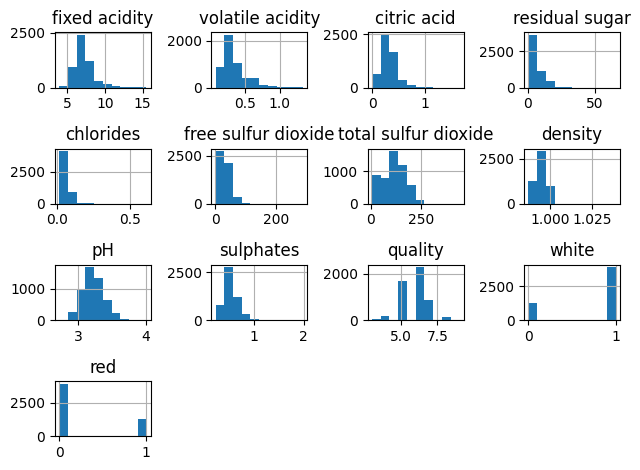

In [118]:
# Una vez tenemos ya las variables que vamos a utilizar buscamos los modelos con los que voy a realizar el estudio
# Vamos a ver su distribución
# Como hemos quitado las columnas categoricas no nos hace falta decir que solo las numéricas
X_train.hist()
plt.tight_layout()

In [119]:
# Vamos a aplicar el logaritmo a las columnas siguientes:
# residual_sugar, chlorides y free_sulful_dioxide
features_numericas = ['residual sugar','chlorides','free sulfur dioxide']
for feature in features_numericas:
    X_train[feature] = X_train[feature]+1
    X_train[feature] = X_train[feature].apply(np.log)
    
    X_test[feature] = X_test[feature]+1
    X_test[feature] = X_test[feature].apply(np.log)

In [120]:
# vamos a aplicar un escalado
# Tendremos que aplicar un StandardScaler

columnas = X_train.columns.to_list()
scaler = StandardScaler()
scaler.fit(X_train[columnas])
# Aplicamos el transform
X_train[columnas] =scaler.transform(X_train[columnas])
X_test[columnas] = scaler.transform(X_test[columnas])

X_train


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,white,red
1916,0.530566,-0.979287,0.553261,-0.675439,-0.205494,0.603446,-0.855503,0.426887,0.692811,2.696948,-0.939103,-1.740311,1.740311
947,-0.087744,-0.979287,2.882601,1.736215,-0.370242,0.820606,1.063516,1.622065,1.005292,0.939171,0.209525,0.574610,-0.574610
877,0.298700,1.046217,-0.542899,-1.224341,-0.502610,-1.317236,-0.204093,-0.901088,-1.057086,-1.629887,0.209525,0.574610,-0.574610
2927,-0.937920,-0.549635,-0.268859,0.789749,-0.074260,0.564028,0.288866,0.058374,-0.994590,-0.210144,0.209525,0.574610,-0.574610
6063,1.380743,0.248291,0.621771,-0.586628,1.525362,-2.003136,-1.859027,0.440167,-0.557116,0.330710,1.358153,-1.740311,1.740311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.628765,-0.611014,1.238361,1.332323,-0.271299,1.282255,1.679715,0.626083,-0.244634,0.263103,-0.939103,0.574610,-0.574610
5191,-0.474187,-0.733772,-0.268859,1.383730,0.089083,-0.011858,0.165626,1.276791,1.442767,-0.548178,-0.939103,0.574610,-0.574610
5226,-0.474187,-0.856530,0.416241,0.823045,-0.107022,0.255061,0.517740,-0.004705,0.630314,0.195496,1.358153,0.574610,-0.574610
5390,0.066834,0.432428,-0.200349,-0.871054,-0.768879,0.045414,-0.732264,-1.933589,-1.619553,-1.224246,2.506780,0.574610,-0.574610


In [121]:

# Generamos un modelo base con regresion lineal.

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [122]:
print("MAE:", median_absolute_error(y_train, pred_train))
print("RMSE:", root_mean_squared_error(y_train, pred_train))
print("R^2:", lin_reg.score(X_train, y_train))

MAE: 0.3544116304299667
RMSE: 0.6069967818020763
R^2: 0.7629377520923388


In [ ]:
# Comprobamos que no hemos mejorado los resultados incluyendo las columnas que nos faltaban anteriormente por lo que nos 
# quedaremos con el modelo original.